**Introduction to Template Matching**

Template Matching is a computer vision technique used to identify and locate a predefined template (a smaller image or pattern) within a larger image. It is a fundamental approach for object detection and image recognition tasks, relying on finding regions in the input image that match the template.

**How Template Matching Works**

1. Input and Template: You provide a larger input image and a smaller template image that represents the object or pattern to find.

2. Sliding Window Operation: The algorithm slides the template across the input image, comparing the template with regions of the same size in the input image.

3. Similarity Measurement: At each position, a similarity metric is computed to determine how closely the template matches the current region of the input   image. Common metrics include:
   - **Cross-correlation**:
    $$
    R(x, y) = \sum_{i, j} I(x+i, y+j) T(i, j)
    $$
   - **Normalized cross-correlation**:
   $$
   R(x, y) = \frac{\sum_{i, j} \left( I(x+i, y+j) - \bar{I} \right) \left( T(i, j) - \bar{T} \right)}{\sqrt{\sum_{i, j} \left( I(x+i, y+j) - \bar{I} \right)^2 \sum_{i, j} \left( T(i, j) - \bar{T} \right)^2}}
   $$
   - **Sum of squared differences (SSD)**:
   $$
   R(x, y) = \sum_{i, j} \left( I(x+i, y+j) - T(i, j) \right)^2
   $$

4. Best Match: The location with the highest similarity score (or lowest SSD) is considered the best match, and the template is assumed to   be found there.

**Applications of Template Matching**

   - Object Detection:  Finding objects like logos, faces, or symbols in images.
   - Industrial Automation: Locating specific parts or components in manufacturing processes.
   - Medical Imaging: Detecting abnormalities by matching a reference template in X-rays or MRIs.
   - Gaming and AR: Identifying patterns or markers in video streams for augmented reality.
   - OCR: Matching character templates for text recognition.

**Limitations**
   - Scale and Rotation Sensitivity: Template matching struggles if the template or input image changes in size or orientation.
   - Illumination Variations: Performance may degrade under varying lighting conditions.
   - Computational Cost: It can be computationally expensive for large images or templates.

**Practice**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load the input image and template image
image = cv2.imread('tumor.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)

In [9]:
# Get the dimensions of the template
template_height, template_width = template.shape

In [10]:
# Method 1: Cross-correlation
def cross_correlation(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF)

# Method 2: Normalized Cross-correlation
def normalized_cross_correlation(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Method 3: Sum of Squared Differences (SSD)
def sum_of_squared_differences(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_SQDIFF)

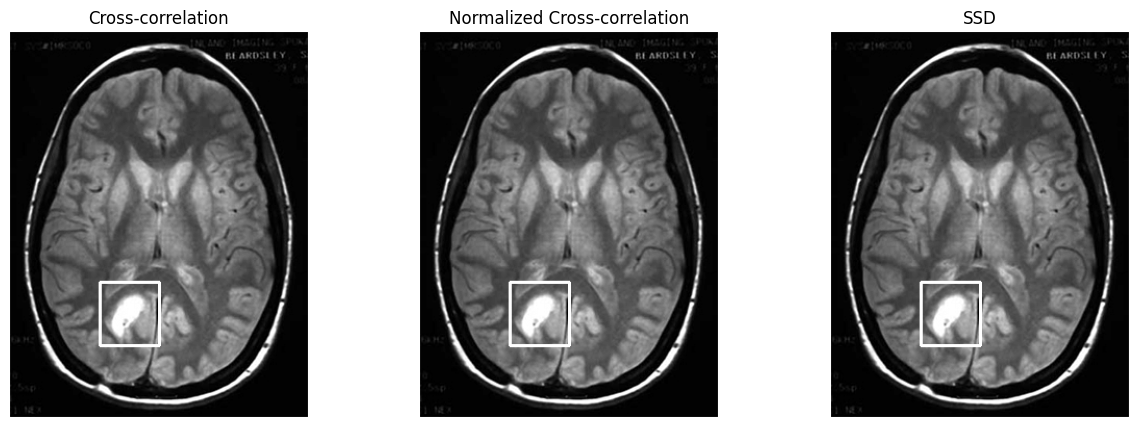

In [11]:
# Apply each method
result_cc = cross_correlation(image, template)
result_ncc = normalized_cross_correlation(image, template)
result_ssd = sum_of_squared_differences(image, template)

# Find the best match location
min_val_ssd, max_val_ssd, min_loc_ssd, max_loc_ssd = cv2.minMaxLoc(result_ssd)
min_val_cc, max_val_cc, min_loc_cc, max_loc_cc = cv2.minMaxLoc(result_cc)
min_val_ncc, max_val_ncc, min_loc_ncc, max_loc_ncc = cv2.minMaxLoc(result_ncc)

# Draw a rectangle around the detected template
top_left_cc = max_loc_cc
bottom_right_cc = (top_left_cc[0] + template_width, top_left_cc[1] + template_height)

top_left_ncc = max_loc_ncc
bottom_right_ncc = (top_left_ncc[0] + template_width, top_left_ncc[1] + template_height)

top_left_ssd = min_loc_ssd
bottom_right_ssd = (top_left_ssd[0] + template_width, top_left_ssd[1] + template_height)

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Cross-correlation
image_cc = image.copy()
cv2.rectangle(image_cc, top_left_cc, bottom_right_cc, 255, 2)
ax[0].imshow(image_cc, cmap='gray')
ax[0].set_title("Cross-correlation")
ax[0].axis('off')

# Normalized Cross-correlation
image_ncc = image.copy()
cv2.rectangle(image_ncc, top_left_ncc, bottom_right_ncc, 255, 2)
ax[1].imshow(image_ncc, cmap='gray')
ax[1].set_title("Normalized Cross-correlation")
ax[1].axis('off')

# Sum of Squared Differences (SSD)
image_ssd = image.copy()
cv2.rectangle(image_ssd, top_left_ssd, bottom_right_ssd, 255, 2)
ax[2].imshow(image_ssd, cmap='gray')
ax[2].set_title("SSD")
ax[2].axis('off')

plt.show()